In [2]:
# Data Loading

In [154]:
import pandas as pd
import matplotlib.pyplot as plt
import re      #For Data Cleaning
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from tqdm import tqdm  
import nltk   # For preprocessing
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package punkt to /Users/nalisha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nalisha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [155]:
data = pd.read_csv("mbti_1.csv")

In [156]:
#creating a bar plot of the uncleaned Data
typeGrouping = data.groupby("type").count()
typeGrouping.sort_values("posts", ascending=False, inplace=True)
print ("Personality types", typeGrouping.index.values)

#Priors used below for Random Guessing Estimation
priors = typeGrouping["posts"] / typeGrouping["posts"].sum()

Personality types ['INFP' 'INFJ' 'INTP' 'INTJ' 'ENTP' 'ENFP' 'ISTP' 'ISFP' 'ENTJ' 'ISTJ'
 'ENFJ' 'ISFJ' 'ESTP' 'ESFP' 'ESFJ' 'ESTJ']


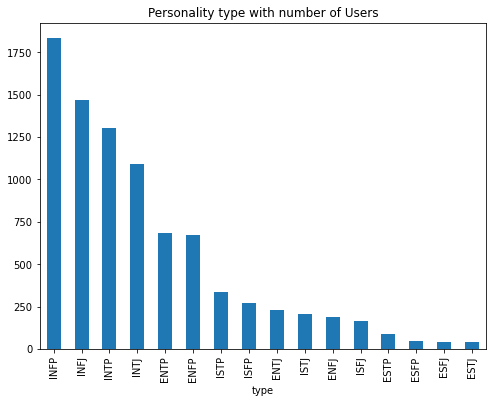

In [157]:
typeGrouping["posts"].plot(kind="bar", title="Personality type with number of Users");

In [158]:
#Data PreProcessing
# Function To replace "|||" from text with " " Join all texts written by 1 Person 
def replaceSeparator(text):
    """Remove '|||' which is used as seprator """
    text = text.replace("|||"," ")
    return text

# Function To remove Links from text and replace them with 'Link' 
def removeLink(text):
    """Replace Links from text to 'Link' """
    text = re.sub(r"http\S+", "Link", text, flags=re.MULTILINE)
    return text

# Function To Remove punctuation from Text 
def removePunctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words
    

In [159]:
replaceSeparator(data.iloc[0][1])

"'http://www.youtube.com/watch?v=qsXHcwe3krw http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks What has been the most life-changing experience in your life? http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today. May the PerC Experience immerse you. The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206 Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as... 84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.jpg ... Welcome and stu

In [160]:
removeLink(data.iloc[0][1])

"'Link and intj moments  Link  sportscenter not top ten plays  Link  pranks|||What has been the most life-changing experience in your life?|||Link   Link  On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   Link ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389  84390  Link  Link ...|||Welcome and stuff.|||Link  Game. Set. Match.|||Prozac, wellbrutin, at least thirty minutes of moving your legs (and I don't mean moving them while sitting in your same desk chair), weed in moderation (maybe try edibles as a healthier alternative...|||Basically come up with three items you've determined that each type (or whichever types you want to do) would more than likely use, given each types' cognitive functions and whatnot

In [161]:
def preProcessing(text):
    text = replace_sep(text) 
    text = remove_link(text) 
    return text

In [163]:
pre_processing_stage_1(data.iloc[0][1])

"'link link enfp and intj moments  link  sportscenter not top ten plays  link  pranks what has been the most life-changing experience in your life? link   link  on repeat for most of today. may the perc experience immerse you. the last thing my infj friend posted on his facebook before committing suicide the next day. rest in peace~   link hello enfj7. sorry to hear of your distress. it's only natural for a relationship to not be perfection all the time in every moment of existence. try to figure the hard times as times of growth, as... 84389  84390  link  link ... welcome and stuff. link  game. set. match. prozac, wellbrutin, at least thirty minutes of moving your legs (and i don't mean moving them while sitting in your same desk chair), weed in moderation (maybe try edibles as a healthier alternative... basically come up with three items you've determined that each type (or whichever types you want to do) would more than likely use, given each types' cognitive functions and whatnot, 